# Import Libraries and CSV file

In [1]:
#import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train.csv")

# Data Cleaning

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
null_columns = df.isna().sum()
null_columns[null_columns.gt(0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
null_columns[null_columns.gt(0)] / len(df)

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
null_prop = null_columns[null_columns.gt(0)] / len(df)

In [8]:
null_prop[null_prop.gt(0)]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [9]:
list(null_prop[null_prop.gt(0)].index)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
df1=df.copy()

In [11]:
df1 = df1.drop(columns=null_prop[null_prop.gt(0)].index)

In [12]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
df1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [14]:
df1.shape

(1460, 62)

In [15]:
df.shape

(1460, 81)

Loss of 19 variables after data clean up! 

# Data Analysis

The goal of the analysis is to identify the most important features of houses that affect the sale prices.

Y = Sales Prices 

X = ...

Defining the dependent/endogenous/response variable aka "Y".

In [16]:
Y = df1.SalePrice

In [17]:
type(Y)

pandas.core.series.Series

In [18]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Defining the indepedent/exogenous/explanatory variables aka "X"

In [19]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
df1.loc[:,"MSSubClass":"SaleCondition"] # >> all potential indepedent variables

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,112,0,0,0,0,4,2010,WD,Normal


In [21]:
df1.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

Not only int or float as data types. Not possible to run a regression for all the variables.

1. Use the int variables

2. Use `pd.get_dummies`

OLS with the int variables

In [22]:
data = [df1.dtypes]

In [23]:
data

[Id                int64
 MSSubClass        int64
 MSZoning         object
 LotArea           int64
 Street           object
                   ...  
 MoSold            int64
 YrSold            int64
 SaleType         object
 SaleCondition    object
 SalePrice         int64
 Length: 62, dtype: object]

In [24]:
df1[['LotArea','YrSold', 'YearBuilt', 'GarageArea', 'PoolArea']]

,LotArea,YrSold,YearBuilt,GarageArea,PoolArea
0,8450,2008,2003,548,0
1,9600,2007,1976,460,0
2,11250,2008,2001,608,0
3,9550,2006,1915,642,0
4,14260,2008,2000,836,0
...,...,...,...,...,...
1455,7917,2007,1999,460,0
1456,13175,2010,1978,500,0
1457,9042,2010,1941,252,0
1458,9717,2010,1950,240,0


In [25]:
X = df1[['LotArea','YrSold', 'YearBuilt', 'GarageArea', 'PoolArea']]

In [26]:
X = sm.add_constant(X) #use numpy.ptp for future versions

C:\Users\brecht\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
X

,const,LotArea,YrSold,YearBuilt,GarageArea,PoolArea
0,1.0,8450,2008,2003,548,0
1,1.0,9600,2007,1976,460,0
2,1.0,11250,2008,2001,608,0
3,1.0,9550,2006,1915,642,0
4,1.0,14260,2008,2000,836,0
...,...,...,...,...,...,...
1455,1.0,7917,2007,1999,460,0
1456,1.0,13175,2010,1978,500,0
1457,1.0,9042,2010,1941,252,0
1458,1.0,9717,2010,1950,240,0


In [28]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     276.6
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          4.82e-208
Time:                        22:36:32   Log-Likelihood:                -18056.
No. Observations:                1460   AIC:                         3.612e+04
Df Residuals:                    1454   BIC:                         3.616e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.534e+05   2.26e+06     -0.289      0.773   -5.09e+06    3.79e+06
LotArea        1.4010      0.153      9.169      0.000       1.101       1.701
YrSold      -428.7782   1125.428     -0.381      0.703   -2636.414    1778.857
YearBuilt    813.0986     56.469     14.399      0.000     702.330     923.867
GarageArea   163.6286      8.120     20.152      0.000     147.701     179.556
PoolArea      98.6468     37.351      2.641      0.008      25.379     171.915
==============================================================================
Omnibus:                      662.335   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7199.131
Skew:                           1.823   Prob(JB):                         0.00
Kurtosis:                      13.250   Cond. No.                     2.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared too small. Take more variables in consideration.

In [29]:
X = df1[['LotArea','YrSold', 'YearBuilt', 'GarageArea', 'PoolArea', 'OverallCond']]

In [30]:
X = sm.add_constant(X) #use numpy.ptp for future versions

In [31]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     242.8
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          4.83e-215
Time:                        22:36:32   Log-Likelihood:                -18037.
No. Observations:                1460   AIC:                         3.609e+04
Df Residuals:                    1453   BIC:                         3.613e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.648e+05   2.23e+06     -0.163      0.870   -4.75e+06    4.02e+06
LotArea         1.4076      0.151      9.330      0.000       1.112       1.704
YrSold       -723.4728   1112.179     -0.651      0.515   -2905.121    1458.175
YearBuilt     942.1479     59.500     15.834      0.000     825.433    1058.863
GarageArea    161.7982      8.022     20.168      0.000     146.062     177.535
PoolArea       98.5413     36.878      2.672      0.008      26.202     170.881
OverallCond  8882.6875   1430.396      6.210      0.000    6076.825    1.17e+04
==============================================================================
Omnibus:                      678.314   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7626.478
Skew:                           1.868   Prob(JB):                         0.00
Kurtosis:                      13.555   Cond. No.                     2.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = df1[['LotArea','YrSold', 'YearBuilt', 'GarageArea', 'PoolArea', 
         'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
         'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 
         'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'GrLivArea']]

In [33]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:32   Log-Likelihood:                -17488.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1438   BIC:                         3.514e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.763e+05   1.57e+06     -0.623      0.533   -4.05e+06     2.1e+06
LotArea           0.3365      0.110      3.050      0.002       0.120       0.553
YrSold         -299.9138    778.965     -0.385      0.700   -1827.944    1228.116
YearBuilt       796.0512     48.278     16.489      0.000     701.347     890.755
GarageArea       47.4899      6.318      7.517      0.000      35.097      59.883
PoolArea        -59.0506     26.056     -2.266      0.024    -110.162      -7.940
OverallCond    8628.8861   1016.974      8.485      0.000    6633.974    1.06e+04
TotalBsmtSF      30.0163      4.346      6.907      0.000      21.492      38.541
1stFlrSF         33.4999     22.302      1.502      0.133     -10.247      77.247
2ndFlrSF         31.0559     21.889      1.419      0.156     -11.883      73.994
BedroomAbvGr  -1.518e+04   1787.329     -8.495      0.000   -1.87e+04   -1.17e+04
KitchenAbvGr  -3.349e+04   5239.335     -6.392      0.000   -4.38e+04   -2.32e+04
TotRmsAbvGrd   7911.7402   1352.079      5.852      0.000    5259.483    1.06e+04
Fireplaces     7386.9721   1915.990      3.855      0.000    3628.537    1.11e+04
WoodDeckSF       27.5831      8.808      3.132      0.002      10.305      44.861
OpenPorchSF       3.3342     16.714      0.199      0.842     -29.452      36.121
EnclosedPorch    42.7662     18.601      2.299      0.022       6.279      79.253
3SsnPorch        23.7564     34.946      0.680      0.497     -44.793      92.306
ScreenPorch      61.4481     19.052      3.225      0.001      24.075      98.822
MiscVal          -1.6895      2.066     -0.818      0.414      -5.742       2.363
MoSold          379.7150    382.856      0.992      0.321    -371.302    1130.732
GrLivArea        33.0961     21.779      1.520      0.129      -9.626      75.819
==============================================================================
Omnibus:                      726.717   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119479.918
Skew:                          -1.230   Prob(JB):                         0.00
Kurtosis:                      47.249   Cond. No.                     2.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Use dummies

In [34]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
df1 = pd.concat([df1, pd.get_dummies(df["Utilities"])], axis=1).drop(columns=["Utilities"])

In [36]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AllPub,NoSeWa
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,208500,1,0
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,181500,1,0
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,223500,1,0
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,140000,1,0
4,5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,250000,1,0


In [37]:
X = df1[['LotArea','YrSold', 'YearBuilt', 'GarageArea', 
         'PoolArea', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
         '2ndFlrSF', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 
         'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
         '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 
         'AllPub', 'NoSeWa', 'GrLivArea'
        ]]

In [38]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     212.5
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:33   Log-Likelihood:                -17487.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1437   BIC:                         3.514e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.796e+05   1.04e+06     -0.651      0.515   -2.73e+06    1.37e+06
LotArea           0.3375      0.110      3.059      0.002       0.121       0.554
YrSold         -287.7999    779.090     -0.369      0.712   -1816.075    1240.475
YearBuilt       796.1435     48.280     16.490      0.000     701.437     890.850
GarageArea       47.5615      6.318      7.528      0.000      35.168      59.955
PoolArea        -59.0766     26.056     -2.267      0.024    -110.189      -7.964
OverallCond    8629.2802   1017.003      8.485      0.000    6634.311    1.06e+04
TotalBsmtSF      29.8110      4.351      6.851      0.000      21.276      38.346
1stFlrSF         33.7840     22.304      1.515      0.130      -9.968      77.536
2ndFlrSF         31.1039     21.890      1.421      0.156     -11.836      74.044
BedroomAbvGr  -1.518e+04   1787.393     -8.491      0.000   -1.87e+04   -1.17e+04
KitchenAbvGr  -3.355e+04   5239.821     -6.403      0.000   -4.38e+04   -2.33e+04
TotRmsAbvGrd   7946.1649   1352.594      5.875      0.000    5292.896    1.06e+04
Fireplaces     7394.2368   1916.059      3.859      0.000    3635.664    1.12e+04
WoodDeckSF       27.5277      8.809      3.125      0.002      10.249      44.807
OpenPorchSF       3.9434     16.727      0.236      0.814     -28.868      36.755
EnclosedPorch    42.8076     18.601      2.301      0.022       6.319      79.296
3SsnPorch        23.7949     34.947      0.681      0.496     -44.757      92.347
ScreenPorch      63.2777     19.148      3.305      0.001      25.716     100.839
MiscVal          -1.7013      2.066     -0.823      0.410      -5.754       2.351
MoSold          360.1166    383.413      0.939      0.348    -391.992    1112.225
AllPub         -3.21e+05   5.22e+05     -0.615      0.539   -1.35e+06    7.03e+05
NoSeWa        -3.586e+05   5.23e+05     -0.685      0.493   -1.39e+06    6.68e+05
GrLivArea        32.8621     21.781      1.509      0.132      -9.864      75.588
==============================================================================
Omnibus:                      725.416   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119325.418
Skew:                          -1.225   Prob(JB):                         0.00
Kurtosis:                      47.221   Cond. No.                     1.12e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
df1['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [40]:
df1 = pd.concat([df1, pd.get_dummies(df["ExterCond"])], axis=1).drop(columns=["ExterCond"])

In [41]:
X = df1[['LotArea','YrSold', 'YearBuilt', 'GarageArea', 
         'PoolArea', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
         '2ndFlrSF', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 
         'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
         '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 
         'AllPub', 'NoSeWa', 'GrLivArea', 
         'TA', 'Gd', 'Fa', 'Ex', 'Po'
        ]]

In [42]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:33   Log-Likelihood:                -17485.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1433   BIC:                         3.517e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.528e+05   9.23e+05     -0.599      0.549   -2.36e+06    1.26e+06
LotArea           0.3382      0.110      3.065      0.002       0.122       0.555
YrSold         -338.6745    779.967     -0.434      0.664   -1868.675    1191.326
YearBuilt       810.3490     49.160     16.484      0.000     713.917     906.781
GarageArea       48.3516      6.338      7.629      0.000      35.919      60.785
PoolArea        -57.9307     26.069     -2.222      0.026    -109.068      -6.794
OverallCond    9161.7059   1097.826      8.345      0.000    7008.188    1.13e+04
TotalBsmtSF      30.1668      4.363      6.914      0.000      21.608      38.725
1stFlrSF         35.9865     22.351      1.610      0.108      -7.858      79.831
2ndFlrSF         33.5520     21.947      1.529      0.127      -9.500      76.604
BedroomAbvGr  -1.509e+04   1788.113     -8.439      0.000   -1.86e+04   -1.16e+04
KitchenAbvGr  -3.342e+04   5244.996     -6.372      0.000   -4.37e+04   -2.31e+04
TotRmsAbvGrd   7930.6228   1352.601      5.863      0.000    5277.332    1.06e+04
Fireplaces     7455.9469   1916.754      3.890      0.000    3696.002    1.12e+04
WoodDeckSF       28.1265      8.828      3.186      0.001      10.809      45.444
OpenPorchSF       1.6483     16.889      0.098      0.922     -31.481      34.778
EnclosedPorch    44.7874     18.625      2.405      0.016       8.252      81.323
3SsnPorch        24.2227     34.935      0.693      0.488     -44.306      92.751
ScreenPorch      64.3808     19.152      3.362      0.001      26.812     101.950
MiscVal          -1.7216      2.071     -0.831      0.406      -5.785       2.341
MoSold          381.1102    383.659      0.993      0.321    -371.484    1133.704
AllPub        -2.577e+05   4.61e+05     -0.559      0.576   -1.16e+06    6.47e+05
NoSeWa        -2.951e+05   4.62e+05     -0.638      0.523    -1.2e+06    6.12e+05
GrLivArea        30.3159     21.841      1.388      0.165     -12.528      73.160
TA            -1.197e+05   1.84e+05     -0.650      0.516   -4.81e+05    2.42e+05
Gd            -1.225e+05   1.84e+05     -0.665      0.506   -4.84e+05    2.39e+05
Fa            -1.059e+05   1.84e+05     -0.574      0.566   -4.68e+05    2.56e+05
Ex            -9.427e+04   1.86e+05     -0.508      0.612   -4.58e+05     2.7e+05
Po            -1.104e+05   1.89e+05     -0.585      0.558    -4.8e+05    2.59e+05
==============================================================================
Omnibus:                      734.120   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122589.437
Skew:                          -1.250   Prob(JB):                         0.00
Kurtosis:                      47.821   Cond. No.                     1.33e+16
================================================================

Now, the R-squared shows the model is relevant. Drop the variables with p-value >= 0.05 from the OLS.

In [43]:
X = df1[['LotArea', 'YearBuilt', 'GarageArea', 
         'OverallCond', 'TotalBsmtSF', 'BedroomAbvGr',
         'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
         'WoodDeckSF','ScreenPorch'
        ]]

In [44]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     341.2
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:34   Log-Likelihood:                -17611.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1448   BIC:                         3.531e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.502e+06   9.53e+04    -15.760      0.000   -1.69e+06   -1.32e+06
LotArea          0.4136      0.119      3.482      0.001       0.181       0.647
YearBuilt      751.3085     47.156     15.933      0.000     658.808     843.809
GarageArea      68.9541      6.655     10.361      0.000      55.899      82.009
OverallCond   8289.0285   1090.375      7.602      0.000    6150.145    1.04e+04
TotalBsmtSF     41.9258      3.122     13.428      0.000      35.801      48.051
BedroomAbvGr -1.372e+04   1919.395     -7.147      0.000   -1.75e+04   -9952.204
KitchenAbvGr -3.999e+04   5503.113     -7.266      0.000   -5.08e+04   -2.92e+04
TotRmsAbvGrd  2.182e+04   1096.301     19.905      0.000    1.97e+04     2.4e+04
Fireplaces    1.491e+04   1991.739      7.483      0.000     1.1e+04    1.88e+04
WoodDeckSF      36.6399      9.428      3.886      0.000      18.146      55.133
ScreenPorch     62.8266     20.383      3.082      0.002      22.842     102.811
==============================================================================
Omnibus:                      471.359   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41466.664
Skew:                           0.517   Prob(JB):                         0.00
Kurtosis:                      29.088   Cond. No.                     1.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
df1['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [46]:
df1 = pd.concat([df1, pd.get_dummies(df["SaleCondition"])], axis=1).drop(columns=["SaleCondition"])

In [47]:
X = df1[['LotArea', 'YearBuilt', 'GarageArea', 
         'OverallCond', 'TotalBsmtSF', 'BedroomAbvGr',
         'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
         'WoodDeckSF','ScreenPorch',
         'Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'
        ]]

In [48]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     242.5
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:34   Log-Likelihood:                -17591.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1443   BIC:                         3.531e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.179e+06    8.3e+04    -14.202      0.000   -1.34e+06   -1.02e+06
LotArea          0.4135      0.117      3.519      0.000       0.183       0.644
YearBuilt      689.7927     47.827     14.423      0.000     595.975     783.610
GarageArea      65.9724      6.628      9.954      0.000      52.971      78.974
OverallCond   8259.0701   1085.591      7.608      0.000    6129.564    1.04e+04
TotalBsmtSF     40.7762      3.115     13.089      0.000      34.665      46.887
BedroomAbvGr -1.203e+04   1922.000     -6.258      0.000   -1.58e+04   -8258.608
KitchenAbvGr  -3.92e+04   5573.666     -7.033      0.000   -5.01e+04   -2.83e+04
TotRmsAbvGrd  2.082e+04   1097.093     18.977      0.000    1.87e+04     2.3e+04
Fireplaces    1.547e+04   1978.912      7.816      0.000    1.16e+04    1.93e+04
WoodDeckSF      41.8445      9.369      4.466      0.000      23.466      60.223
ScreenPorch     65.8137     20.171      3.263      0.001      26.247     105.381
Normal       -2.009e+05   1.44e+04    -13.987      0.000   -2.29e+05   -1.73e+05
Partial      -1.774e+05   1.55e+04    -11.423      0.000   -2.08e+05   -1.47e+05
Abnorml      -2.062e+05   1.43e+04    -14.388      0.000   -2.34e+05   -1.78e+05
Family       -2.217e+05   1.61e+04    -13.784      0.000   -2.53e+05    -1.9e+05
Alloca       -1.946e+05   1.81e+04    -10.721      0.000    -2.3e+05   -1.59e+05
AdjLand      -1.781e+05   2.25e+04     -7.923      0.000   -2.22e+05   -1.34e+05
==============================================================================
Omnibus:                      467.721   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52091.998
Skew:                           0.406   Prob(JB):                         0.00
Kurtosis:                      32.251   Cond. No.                     6.53e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

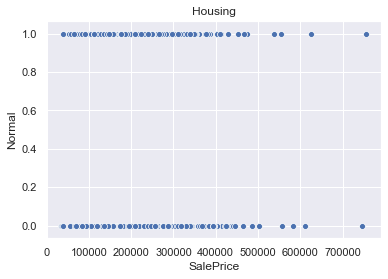

In [49]:
sns.scatterplot(data=df1,
             x="SalePrice",
             y="Normal").set_title("Housing");

New coefficient regression from new (dummies) variables around 0. Drop them.

In [50]:
X = df1[['LotArea', 'YearBuilt', 'GarageArea', 
         'TotalBsmtSF','WoodDeckSF','ScreenPorch',
        ]]

In [51]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     334.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          2.66e-269
Time:                        22:36:36   Log-Likelihood:                -17911.
No. Observations:                1460   AIC:                         3.584e+04
Df Residuals:                    1453   BIC:                         3.587e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.125e+06   1.03e+05    -10.940      0.000   -1.33e+06   -9.23e+05
LotArea         0.7834      0.143      5.482      0.000       0.503       1.064
YearBuilt     595.3357     53.168     11.197      0.000     491.041     699.630
GarageArea    116.8419      7.825     14.933      0.000     101.493     132.191
TotalBsmtSF    56.3584      3.728     15.119      0.000      49.046      63.671
WoodDeckSF     76.0991     11.388      6.683      0.000      53.761      98.437
ScreenPorch   121.1668     24.549      4.936      0.000      73.012     169.322
==============================================================================
Omnibus:                      541.441   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13266.906
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                      17.584   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Can the Neighborhood variable explain the sales prices?

In [52]:
df1 = pd.concat([df1, pd.get_dummies(df["Neighborhood"])], axis=1).drop(columns=["Neighborhood"])

In [53]:
X = df1[['LotArea', 'YearBuilt', 'GarageArea', 
         'TotalBsmtSF','WoodDeckSF','ScreenPorch',
         'NAmes','CollgCr','OldTown','Edwards',
         'Somerst','Gilbert','NridgHt','Sawyer',
         'NAmes','SawyerW','BrkSide','Crawfor','Mitchel',
         'NoRidge','Timber','IDOTRR','ClearCr',
         'StoneBr','SWISU','Blmngtn',
         'MeadowV','BrDale','Veenker',
         'NPkVill','Blueste'
        ]]

In [54]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:37   Log-Likelihood:                -17646.
No. Observations:                1460   AIC:                         3.535e+04
Df Residuals:                    1429   BIC:                         3.552e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.942e+05   1.66e+05     -3.589      0.000   -9.19e+05   -2.69e+05
LotArea         0.7641      0.131      5.815      0.000       0.506       1.022
YearBuilt     338.7195     84.236      4.021      0.000     173.480     503.959
GarageArea     81.8956      6.970     11.751      0.000      68.224      95.567
TotalBsmtSF    44.0251      3.308     13.308      0.000      37.536      50.515
WoodDeckSF     62.0305      9.834      6.308      0.000      42.739      81.322
ScreenPorch   120.7821     20.883      5.784      0.000      79.818     161.747
NAmes       -9149.6804   3007.722     -3.042      0.002    -1.5e+04   -3249.656
CollgCr      4229.1816   6474.979      0.653      0.514   -8472.303    1.69e+04
OldTown     -6894.4239   7844.060     -0.879      0.380   -2.23e+04    8492.685
Edwards     -2.051e+04   6958.109     -2.948      0.003   -3.42e+04   -6861.198
Somerst      2.795e+04   7363.473      3.796      0.000    1.35e+04    4.24e+04
Gilbert      1.932e+04   7433.393      2.600      0.009    4743.121    3.39e+04
NridgHt      7.989e+04   7587.598     10.529      0.000     6.5e+04    9.48e+04
Sawyer      -2.461e+04   7270.816     -3.385      0.001   -3.89e+04   -1.03e+04
NAmes       -9149.6804   3007.722     -3.042      0.002    -1.5e+04   -3249.656
SawyerW      3917.2785   7703.002      0.509      0.611   -1.12e+04     1.9e+04
BrkSide     -4118.2406   8510.264     -0.484      0.629   -2.08e+04    1.26e+04
Crawfor      5.216e+04   8406.321      6.205      0.000    3.57e+04    6.87e+04
Mitchel     -2.516e+04   8052.350     -3.125      0.002    -4.1e+04   -9364.993
NoRidge      1.051e+05   8705.206     12.070      0.000     8.8e+04    1.22e+05
Timber       2.199e+04   8947.644      2.458      0.014    4437.514    3.95e+04
IDOTRR      -2.595e+04   9643.857     -2.691      0.007   -4.49e+04   -7033.112
ClearCr      8736.1034   9993.389      0.874      0.382   -1.09e+04    2.83e+04
StoneBr      8.723e+04   1.03e+04      8.503      0.000    6.71e+04    1.07e+05
SWISU        1.165e+04   1.09e+04      1.066      0.286   -9781.273    3.31e+04
Blmngtn     -2415.0969    1.2e+04     -0.202      0.840   -2.59e+04    2.11e+04
MeadowV     -3.615e+04   1.19e+04     -3.034      0.002   -5.95e+04   -1.28e+04
BrDale      -2.368e+04   1.22e+04     -1.942      0.052   -4.76e+04     236.963
Veenker      2.796e+04   1.41e+04      1.984      0.047     319.581    5.56e+04
NPkVill     -2.021e+04   1.54e+04     -1.313      0.189   -5.04e+04    9981.149
Blueste     -1.542e+04   3.12e+04     -0.495      0.621   -7.66e+04    4.57e+04
==============================================================================
Omnibus:                      558.716   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10763.442
Skew:                           1.289   Prob(J

Not really. Back to the follow OLS:

In [55]:
X = df1[['LotArea', 'YearBuilt', 'GarageArea', 
         'OverallCond', 'TotalBsmtSF', 'TotRmsAbvGrd', 
         'WoodDeckSF','ScreenPorch'
        ]]

In [56]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     393.3
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:37   Log-Likelihood:                -17702.
No. Observations:                1460   AIC:                         3.542e+04
Df Residuals:                    1451   BIC:                         3.547e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.734e+06   9.84e+04    -17.611      0.000   -1.93e+06   -1.54e+06
LotArea          0.5677      0.124      4.563      0.000       0.324       0.812
YearBuilt      838.6229     49.302     17.010      0.000     741.912     935.333
GarageArea      79.3188      7.007     11.320      0.000      65.574      93.064
OverallCond   9750.8753   1145.244      8.514      0.000    7504.365     1.2e+04
TotalBsmtSF     49.0185      3.266     15.010      0.000      42.613      55.424
TotRmsAbvGrd  1.616e+04    786.904     20.538      0.000    1.46e+04    1.77e+04
WoodDeckSF      50.9731      9.959      5.118      0.000      31.437      70.509
ScreenPorch     98.9142     21.326      4.638      0.000      57.082     140.747
==============================================================================
Omnibus:                      471.790   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26321.229
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                      23.757   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

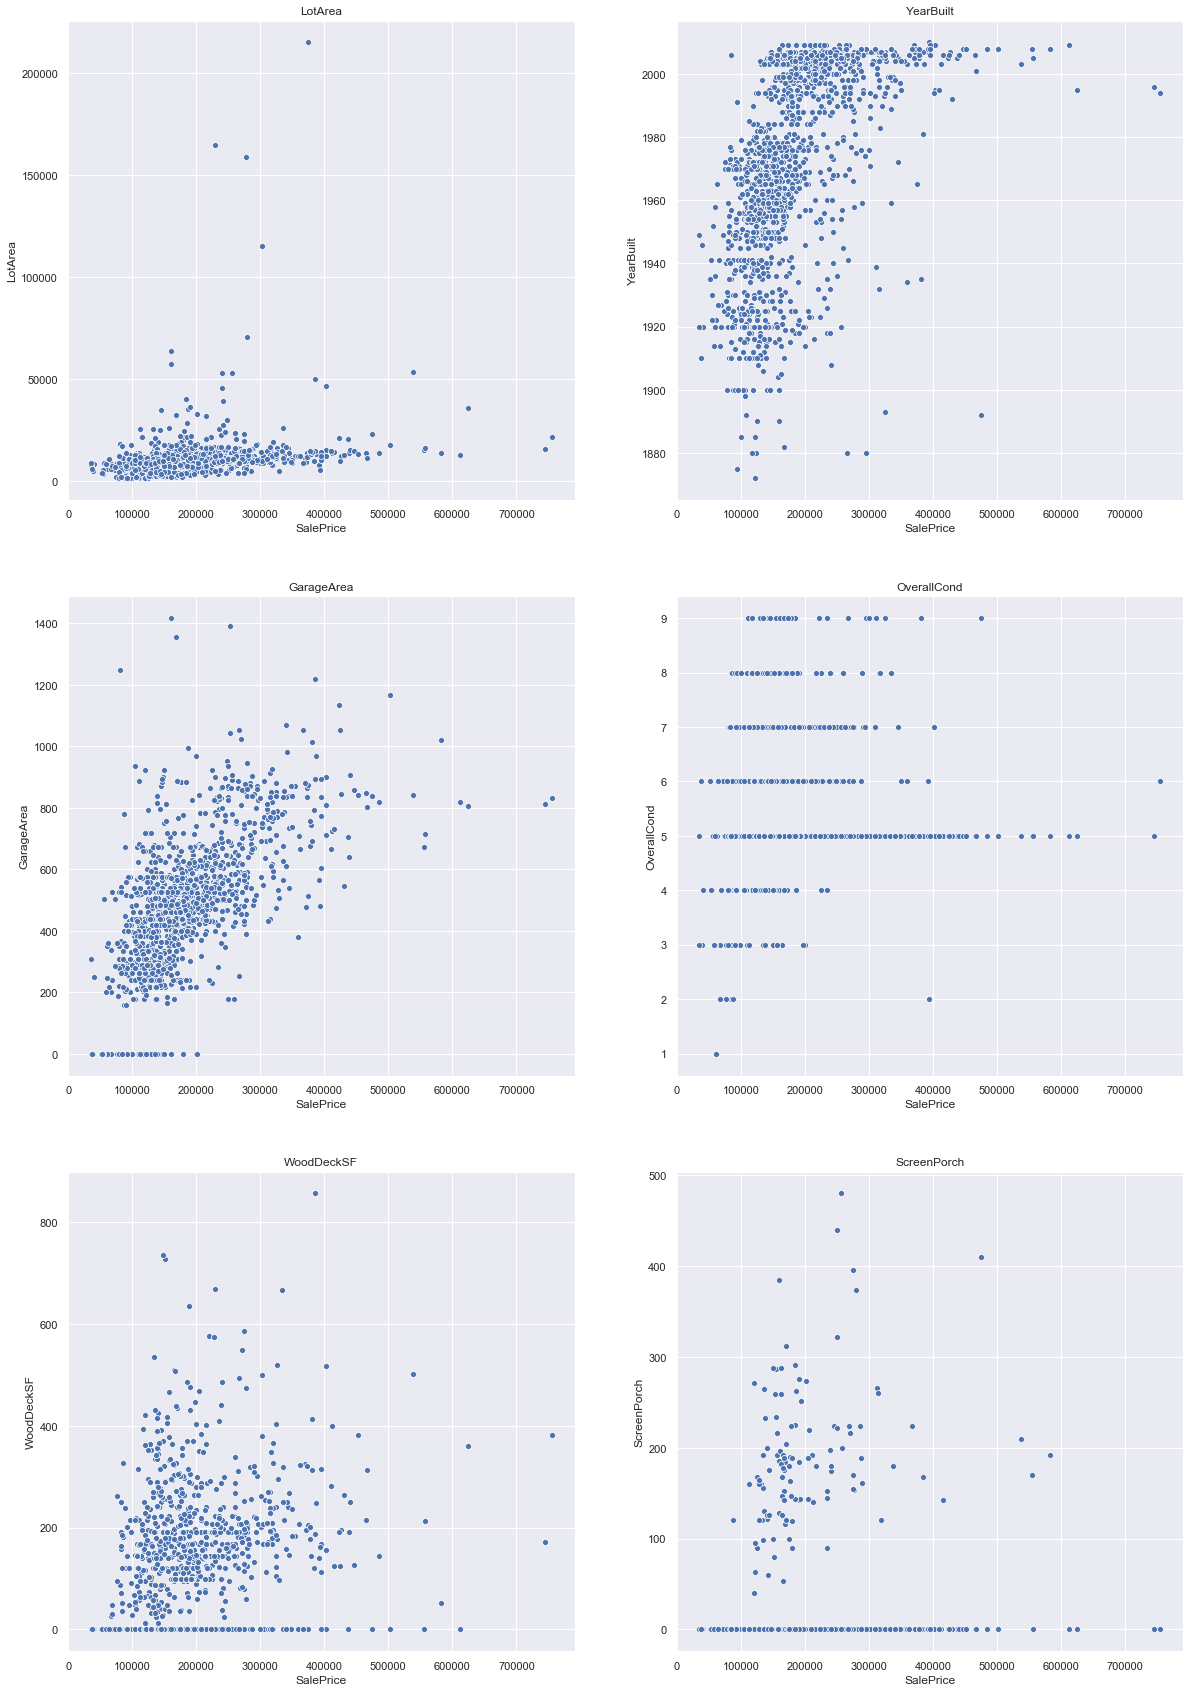

In [57]:
fig, ax =plt.subplots(3,2, figsize=(20,30))

sns.scatterplot(data=df1,
             x="SalePrice",
             y="LotArea", ax=ax[0,0]).set_title("LotArea");

sns.scatterplot(data=df1,
             x="SalePrice",
             y="YearBuilt", ax=ax[0,1]).set_title("YearBuilt");

sns.scatterplot(data=df1,
             x="SalePrice",
             y="GarageArea", ax=ax[1,0]).set_title("GarageArea");

sns.scatterplot(data=df1,
             x="SalePrice",
             y="OverallCond", ax=ax[1,1]).set_title("OverallCond");

sns.scatterplot(data=df1,
             x="SalePrice",
             y="WoodDeckSF", ax=ax[2,0]).set_title("WoodDeckSF");

sns.scatterplot(data=df1,
             x="SalePrice",
             y="ScreenPorch", ax=ax[2,1]).set_title("ScreenPorch");